✅ Models trained successfully!


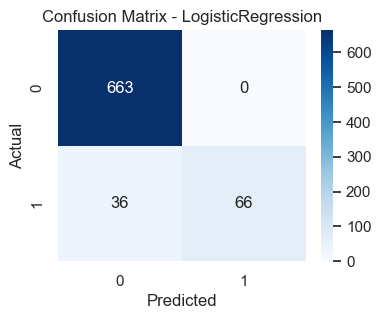

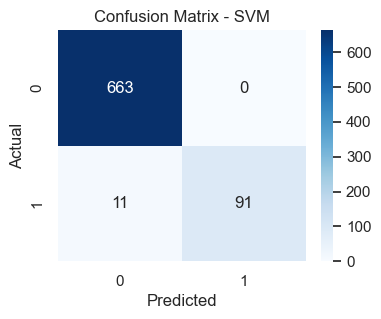

                Model  Accuracy  Precision    Recall        F1
0  LogisticRegression  0.952941        1.0  0.647059  0.785714
1                 SVM  0.985621        1.0  0.892157  0.943005
✅ Model comparison saved to results/model_comparison.csv


C:\Users\DELL\AppData\Local\Temp\ipykernel_3516\1364422087.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_results, palette='coolwarm')


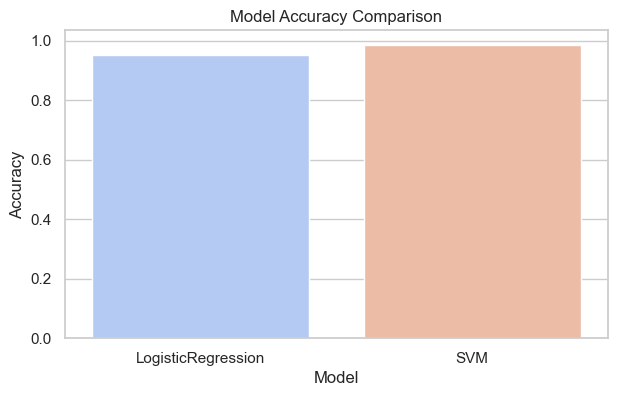

In [1]:
# ===============================
# 03_modeling_evaluation.ipynb
# ===============================

# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sys
sys.path.append('../src')

from model_train import train_models
from evaluate import evaluate_model

sns.set(style='whitegrid')

# Cell 2: Load data
X_train, X_test, y_train, y_test = joblib.load('../results/train_test_split.pkl')

# Cell 3: Train models
models = train_models(X_train, y_train)
print("✅ Models trained successfully!")

# Cell 4: Evaluate each model
results = []
for name, model in models.items():
    metrics, cm = evaluate_model(model, X_test, y_test)
    results.append({'Model': name, **metrics})
    
    # Plot confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'../results/confusion_matrix_{name.lower()}.png')
    plt.show()

# Cell 5: Model comparison summary
df_results = pd.DataFrame(results)
print(df_results)

df_results.to_csv('../results/model_comparison.csv', index=False)
print("✅ Model comparison saved to results/model_comparison.csv")

# Cell 6: Visual comparison
plt.figure(figsize=(7,4))
sns.barplot(x='Model', y='Accuracy', data=df_results, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.show()
